In [1]:
import numpy as np
import tensorflow as tf

import os
import struct

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10499529246801103741]

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

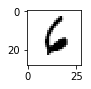

6


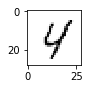

4


In [16]:
def show(image):
    fig = pyplot.figure(figsize=(1,1))
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    pyplot.show()

show(mnist.train.images[3].reshape([28,28]))
print(np.argmax(mnist.train.labels[3]))
show(mnist.test.images[555].reshape([28,28]))
print(np.argmax(mnist.test.labels[555]))

In [17]:
xtrain, xval, ytrain, yval = train_test_split(mnist.train.images, mnist.train.labels, test_size=0.1, random_state=42)
xtest = mnist.test.images
ytest = mnist.test.labels
xtrain.shape, xval.shape, xtest.shape

((49500, 784), (5500, 784), (10000, 784))

In [38]:
image_size = 28 * 28
layer1 = 300
output_size = 10

learning_rate = 0.1
iterations = 15000
dropout = 0.5
batch_size = 128

In [19]:
x = tf.placeholder(tf.float32, [None, image_size])
y = tf.placeholder(tf.float32, [None, output_size])
keep_probability = tf.placeholder(tf.float32)

In [20]:
w_relu = tf.Variable(tf.truncated_normal([image_size, layer1], stddev=0.01))
b_relu = tf.Variable(tf.truncated_normal([layer1], stddev=0.01))

w = tf.Variable(tf.zeros([layer1, output_size]))
b = tf.Variable(tf.zeros([output_size]))

In [21]:
h = tf.nn.relu(tf.matmul(x, w_relu) + b_relu) # relu layer
h_drop = tf.nn.dropout(h, keep_probability) # dropout layer
y_pred = tf.nn.softmax(tf.matmul(h_drop, w) + b) # softmax output

In [22]:
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [39]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
for i in range(iterations):
    x_batch, y_batch = mnist.train.next_batch(batch_size)
    session.run(train_step, feed_dict={x: x_batch, y: y_batch, keep_probability: dropout})
    if i%1000==0:
        print(i)
print('Done')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Done


In [40]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1)), tf.float32))
errors = tf.reduce_sum(tf.cast(tf.not_equal(tf.argmax(y_pred, 1), tf.argmax(y, 1)), tf.float32))
acc  = session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_probability: dropout})
errs = session.run(  errors, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_probability: dropout})
print("Accuracy: %s errors: %s" % (acc, errs))

Accuracy: 0.9706 errors: 275.0
